Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

Load Dataset

In [4]:
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Build the Convolution Neural Network Model

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [15]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the Model

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Train the model

In [17]:
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test), validation_split=0.2)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3014 - loss: 1.8637 - val_accuracy: 0.5260 - val_loss: 1.2921
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5257 - loss: 1.3137 - val_accuracy: 0.6179 - val_loss: 1.0983
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6032 - loss: 1.1233 - val_accuracy: 0.6444 - val_loss: 0.9953
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6462 - loss: 1.0024 - val_accuracy: 0.6603 - val_loss: 0.9746
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6789 - loss: 0.9151 - val_accuracy: 0.6875 - val_loss: 0.8975
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7043 - loss: 0.8447 - val_accuracy: 0.6997 - val_loss: 0.8656
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7265 - loss: 0.7910 - val_accuracy: 0.6926 - val_loss: 0.8819
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7421 - loss: 0.7390 - val_accuracy: 0.

Evaluate the model

In [18]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7355 - loss: 0.7874
Test Accuracy: 0.7307999730110168


Make Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


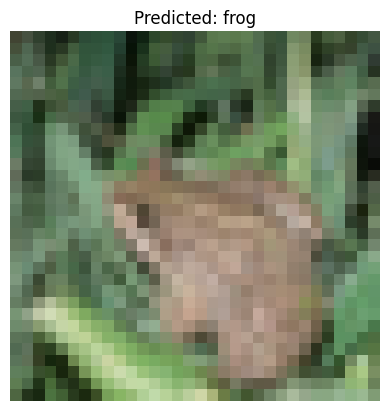

In [19]:
predictions = model.predict(x_test)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(5):
  plt.imshow(x_test[i])
  plt.xlabel(f'Actual: {class_names[np.argmax(y_test[i])]}')
  plt.title(f'Predicted: {class_names[np.argmax(predictions[i])]}')
  plt.axis('off')
  plt.show